# Recipes Amore
---
What are you in the mood to cook today? 
Maybe you have a specific craving or even just an ingredient lying around you're trying to use.

Thousands of recipes have been collected from allrecipes.com and have been compiled to help. Using this recipe recommender system, all you need to do is enter those ingredients you're in the mood for and then choose something delicious to make from the results!

In [590]:
# !pip install --upgrade git+git://github.com/hhursev/recipe-scrapers.git
# Consider adding calories and serving sizes

In [591]:
from recipe_scrapers import scrape_me
import pandas as pd
import numpy as np
import time

In [592]:
# To test the scraper, a single scrape is performed. There may be recipes with lower numbers, but this is the lowest yet found.
# scraper = scrape_me('https://www.allrecipes.com/recipe/6663/')

# # Different methods become available with the scraper modules. To test them, uncomment and run the code on scraper.
# # scraper.title()
# # scraper.total_time()
# # scraper.ingredients()
# # scraper.instructions()
# # scraper.links()

In [593]:
# ### DON'T MESS WITH THIS. IT DOES THE THING.


# # To run a scrape across allrecipes.com, a function is needed. 
# scrape_url_nude = 'https://www.allrecipes.com/recipe/' # a baseline URL for the function
# recipe_numbers  = list(range(18661, 300000)) # Recipe numbers.Thusfar, only recipes between 6663 and 18660, inclusive, have been collected. 300000 is an arbitrary endpoint.
# len(recipe_numbers) # Checking how many recipes we are attempting to scrape. This is a test, not a function component.
# recipe_df_columns = ['Recipe Number', 'Title', 'Total Time', 'Ingredients', 'Instructions'] # Intended columns for the scrape's output dataframe. 
# recipe_df = pd.DataFrame(columns = recipe_df_columns) # Instantiating the dataframe. 

# def the_big_scrape(): # a function that starts the scrape. 
#     for rec in recipe_numbers:
#         try: 
#             scraped = scrape_me(scrape_url_nude+str(rec))
#             recipe_df.loc[rec]= [rec, scraped.title(), scraped.total_time(), scraped.ingredients(), scraped.instructions()]
# # # The following two lines were intended to skip 404ed pages, but resulted in no scraping taking plac.e. Unsure why. Can clean on the back end. 
# #             if scrape.title() == 'Bummer.': # 'Bummer.' is the title of URLs which have no recipe, their 404 message. 
# #                 continue
#             if rec % 10 == 0: # saving every time a recipe with a factor of 10 isn't 404. If something goes wrong with the scrape, previous materials are saved. 
#                 recipe_df.to_csv('./recipe_df3.csv')
#         except:
#             continue
#         time.sleep(1) # scrapes once every three seconds. 

# the_big_scrape() # runs the scrape

In [594]:
# ### DON'T MESS WITH THIS. IT DOES THE THING.


# # To run a scrape across allrecipes.com, a function is needed. 
# scrape_url_nude = 'https://www.allrecipes.com/recipe/' # a baseline URL for the function
# recipe_numbers  = list(range(12280, 48200)) # Recipe numbers. 48200 is the last number I need/want until after Nov 2018.
# len(recipe_numbers) # Checking how many recipes we are attempting to scrape. This is a test, not a function component.
# recipe_df_columns = ['Recipe Number', 'Rating', 'Number of Ratings'] # Intended columns for the scrape's output dataframe. 
# recipe_df = pd.DataFrame(columns = recipe_df_columns) # Instantiating the dataframe. 

# def the_big_scrape(recipe_numbers): # a function that starts the scrape. 
#     for rec in recipe_numbers:
#         try: 
#             req = requests.get(scrape_url_nude+str(rec))
#             soup = BeautifulSoup(req.text, 'lxml')
#             rating = soup.find_all('div', {'class': 'rating-stars'})[0]['data-ratingstars']  # Rating: <div class="rating-stars" onclick="AnchorScroll('reviews')" data-ratingstars="4.17647075653076">
#             num_rating = soup.find_all('h4', {'class': 'helpful-header'})[0].get_text()[:-8] # Number of Ratings: <h4 class="helpful-header">68 Ratings</h4>
#             recipe_df.loc[rec]= [rec, rating, num_rating] 
#         except:
#             rating = 0
#             num_rating = 0
#             recipe_df.loc[rec]= [rec, rating, num_rating]            
#             if rec % 10 == 0: # saving every time a recipe with a factor of 10 isn't 404. If something goes wrong with the scrape, previous materials are saved. 
#                 recipe_df.to_csv('./recipe_ratings_df.csv')
#             continue
#           time.sleep(1) # scrapes once every second. 
# the_big_scrape(recipe_numbers) # runs the scrape

In [595]:
recipe_df_raw = pd.read_csv('./recipes 48200 ratings 210 new.csv')
recipe_df_raw.head(4)

,Unnamed: 0,Recipe Number,Title,Total Time,Ingredients,Instructions,Rating,Number of Ratings
0,0,0,Bummer.,0,[],NaN,0.00,0.0
1,1,1,Bummer.,0,[],NaN,0.00,0.0
2,2,2,Bummer.,0,[],NaN,0.00,0.0
3,3,3,Mexican Strawberry Water (Agua de Fresa),265,"['4 cups strawberries, sliced', '1 cup white s...",NaN,4.65,80.0


### Defining a recipe

---
Each recipe needs a set of characteristics, variables, stored within columns of a Pandas DataFrame.

The recipe variables are:

    Recipe ID: The unique number that appends the recipe url on allrecipes.com (integer)
    Title: The name of the recipe (string)
    Total time: The number of minutes the recipe should take to prepare and cook. (integer)
    Ingredients: The ingredients that go into the recipe. (list of strings)
    Instructions: Step-by-step cooking instructions (list)
    Rating: The average rating left by users
    Number of ratings: The number of ratings left by users. 
    
Sometimes these variables are unideal. Many cooking times are missing. Recipes are user-submitted and this product, Recipe Amore, currently does not take into account ratings.

<img src="https://imgur.com/cfQTzEB.png" style="float: left; margin: 15px; height: 50px"> 
#### 'Bummer.'
 
Not every URL has a recipe attached. Many have been removed either by the user or by allrecipes themselves for any number of potential reasons. Allrecipes.com uses this eggy image for their 404 to let you know they don't have a recipe there. Before building the recommender system, it was important to ahve these cleared out so you can better guarantee every recipe you see will be a winner!


In [596]:
# Look at the data
recipe_df_raw.head(4) 

,Unnamed: 0,Recipe Number,Title,Total Time,Ingredients,Instructions,Rating,Number of Ratings
0,0,0,Bummer.,0,[],NaN,0.00,0.0
1,1,1,Bummer.,0,[],NaN,0.00,0.0
2,2,2,Bummer.,0,[],NaN,0.00,0.0
3,3,3,Mexican Strawberry Water (Agua de Fresa),265,"['4 cups strawberries, sliced', '1 cup white s...",NaN,4.65,80.0


In [597]:
# Check the size of the DataFrame
recipe_df_raw.shape # (25994, 8)

(25994, 8)

In [598]:
# showed an unexpected column, 'Unnamed: 0'
# Column 'Unnamed: 0' seems to be a copy of the recipe number. Confirm or deny this. 
(recipe_df_raw['Unnamed: 0'] == recipe_df_raw['Recipe Number']).value_counts() # demonstrates them to be exact copies. 'Unnamed: 0' will need to be removed.

True    25994
dtype: int64

In [599]:
# Check the number of 404 URLs
recipe_df_raw.isnull().sum()

Unnamed: 0               0
Recipe Number            0
Title                    0
Total Time               0
Ingredients              0
Instructions          8572
Rating               25783
Number of Ratings    25783
dtype: int64

In [600]:
# # In case anything needs changing, it's important to know about the data
recipe_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25994 entries, 0 to 25993
Data columns (total 8 columns):
Unnamed: 0           25994 non-null int64
Recipe Number        25994 non-null int64
Title                25994 non-null object
Total Time           25994 non-null int64
Ingredients          25994 non-null object
Instructions         17422 non-null object
Rating               211 non-null float64
Number of Ratings    211 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.6+ MB


In [601]:
# Where 'Bummer.' appears as a title, scraper.title(), the recipe is absent. We have 8570 of these.
recipe_df_raw.loc[recipe_df_raw['Title'] == 'Bummer.'].count()

Unnamed: 0           8570
Recipe Number        8570
Title                8570
Total Time           8570
Ingredients          8570
Instructions            0
Rating                210
Number of Ratings     210
dtype: int64

In [602]:
# There are 8572 recipes without instructions. These may be blank recipes of the "Bummer." variety.
recipe_df_raw.isnull().sum() 
# Where these additional two null recipes come from is unclear, but it is safer to go by "Bummer." as it is the official allrecipes 404, rather than inferred.

Unnamed: 0               0
Recipe Number            0
Title                    0
Total Time               0
Ingredients              0
Instructions          8572
Rating               25783
Number of Ratings    25783
dtype: int64

In [603]:
# Recipes with the title "Johnsonville® Three Cheese Italian Style Chicken Sausage Skillet Pizza" appear 2202 times.
 # The next most repeated recipe titles are not identicals
recipe_df_raw['Title'].value_counts().head()

Bummer.                                                                   8570
Johnsonville® Three Cheese Italian Style Chicken Sausage Skillet Pizza    2202
English Trifle                                                               4
Corn Pudding II                                                              3
Delmonico Potatoes                                                           3
Name: Title, dtype: int64

In [604]:
recipe_df_cooking = recipe_df_raw[recipe_df_raw['Title'] != 'Bummer.']
recipe_df_cooked = recipe_df_cooking[recipe_df_cooking['Title'] != 'Johnsonville® Three Cheese Italian Style Chicken Sausage Skillet Pizza']

# # The troubling entries are gone. If more recipes are added, more exploration will be required to confirm nothing more need be done. 
# recipe_df_cooked['Title'].value_counts()

## Scraping again, a new DataFrame
Scraping was re-performed, scraping only those rows which lacked mentions of "Bummer." or "Johnsonville® Three Cheese Italian Style Chicken Sausage Skillet Pizza". Only Rating and Number of ratings were collected. The data was added in microsoft excel and saved as CSV. 

More EDA is necessary. 

In [605]:
recipe_df = pd.read_csv('./recipe_df_cooked.csv')
recipe_df.head(4)

,Unnamed: 0,Recipe Number,Title,Total Time,Ingredients,Instructions,Rating,Number of Ratings
0,3,3,Mexican Strawberry Water (Agua de Fresa),265,"['4 cups strawberries, sliced', '1 cup white s...",NaN,4.650000,80.0
1,6663,6663,Crispy Cheese Twists,0,"['1/2 cup Parmesan cheese', '3/4 teaspoon grou...","Combine parmesan cheese, pepper and garlic pow...",4.176471,68.0
2,6664,6664,"Basil, Roasted Peppers and Monterey Jack Cornb...",100,"['1/2 cup unsalted butter, chilled and cubed',...",Preheat oven to 400 degrees F (205 degrees C)....,4.327586,58.0
3,6665,6665,Mom's Yeast Rolls,0,"['2 cups hot water', '1/2 cup margarine', '1/3...",Melt margarine in hot water. Add sugar and sal...,3.623116,199.0


In [606]:
recipe_df.shape

(15222, 8)

In [607]:
# # Checking the most common number of ratings.
# # Excel showed many empty ratings.
# # If the number is excessive, these recipes will be removed to clean the dataset.
# # This is often due to erroneous scraping, not an actual lack of recipes.
# # This was verified by checking some recipes values in the DataFrame vs checking their URL.
# # The cause is currently undetermined. 
# # There are 5086 recipes with no rating information.
# # A recommender system is to be build on these ratings.
# # They will be removed for the prototype.
# recipe_df['Number of Ratings'].value_counts() 

In [608]:
# A new DataFrame is designed for the recommender system without the zero-value-'Number of Ratings' entries
rr_df = recipe_df[recipe_df['Number of Ratings'] != 0]
# rr_df['Number of Ratings'].value_counts() # Success.

While the recommender system is a cookbook, it makes sense to list our article in the rows of our DataFrame. 
Each row is a recipe.
The recommender system's article of interest is the customer utilizing the recipe.
In the recommender system, we will put users in rows.

# Head down to the "Recommender System" section below!

### Example recipe
Recipes will again contain the following: 

    Recipe ID: The unique number that appends the recipe url on allrecipes.com (integer)
    Title: The name of the recipe (string)
    Total time: The number of minutes the recipe should take to prepare and cook. (integer)
    Ingredients: The ingredients that go into the recipe. (list of strings)
    Instructions: Step-by-step cooking instructions (list)
    Rating: The average rating left by users
    Number of ratings: The number of ratings left by users. 

In [609]:
# # To avoid damaging important information, a separate working copy is made.
# # Searches will best be performed without having to worry about capitalization
# # Results have recipe numbers which can be used to find the entries in the original dataframe so the output has capitalization.
ingr_search_df = recipe_df_cooked.copy()
ingr_search_df['Ingredients'] = recipe_df_cooked['Ingredients'][:].str.lower()

# # Testing.
# ingr_search_df.head(3)

In [610]:
# # This bit of code is part of an exploration in how to enter a set of text into python and get out that same set of text without quotation marks.
# # It was intended for use with the filtration function as a means by which to remove the need for any quotation marks. 
# lip = 43
# dir(lip)
# attrs = dir(lip)
# attrs

In [611]:
def rec_by_ingr(ingr):
    result = ingr_search_df[ingr_search_df['Ingredients'].str.contains(ingr.lower())]
    display(result)
# The code below words to call the function
# rec_by_ingr('flour') 

In [612]:
def rec_by_ingr(ingr, ingr2):
    result = ingr_search_df[ingr_search_df['Ingredients'].str.contains(ingr.lower())]
    result2 = result[result['Ingredients'].str.contains(ingr2.lower())]
    display(result2.head(10))
# The code below words to call the function
# rec_by_ingr('onion', 'bacon')

In [613]:
# ingr_search_df[ingr_search_df['Ingredients'].str.contains('chicken'.lower())][ingr_search_df['Ingredients'].str.contains('water'.lower())]

In [614]:
txt = "welcome, to the jungle"

x = txt.split(', ')

print(x)

['welcome', 'to the jungle']


In [615]:
def search_df():
    ingr_search_df = recipe_df_cooked.copy() # creates a working copy of the dataframe within the function
    ingr_search_df['Ingredients'] = recipe_df_cooked['Ingredients'][:].str.lower() # lowercases the column being searched
    ingredients = input('What ingredients do you want to use? Please separate with commas and spaces ", ":') # search terms entered
    ingredients = ingredients.lower() # lowercases search input
    ingredients_list = ingredients.split(', ') # turns input into list
    length_variable = len(ingredients_list) # counts the length of the input list
    count = 0 # is a count used inside the function to ensure all of the search terms are used.
    
    for i in ingredients_list:
        
        if ingr_search_df[ingr_search_df['Ingredients'].str.contains(i)].shape[0] > 0: # if the search finds a result, proceed.
            ingr_search_df = ingr_search_df[ingr_search_df['Ingredients'].str.contains(i)] # in-function, redefine the df with the search filter
            count += 1 #increase the above count. If it matches the num of search terms function will end 
            continue
            
        elif:
            count += 1
            if count == length_variable:
                if ingr_search_df['Ingredients'].equals(recipe_df_cooked['Ingredients'][:].str.lower()) == True:
                    print("No results. Please try another ingredient.")
                else:
                    continue
            else:
                continue
        else:
            if count !< length_variable: # if count is not less than the number of search terms....
                
                # This needs to be changed. Currently, the function searches for one ingredient, 
                # asks repeatedly if more are desired, then spits out the answer. Other ingredients get ignored.
                # this can be prevented by moving the "Would you like to see more" outside the for loop
                # and instead make it as a function termination sequence. 
                # Currently, the function termination is too nested for this to be viable. 
                # Functionality will need to be altered, the termination (display) methods to be moved to a higher level. 
                
                more = 'y'
                while more.lower() == 'y':
                    display(ingr_search_df.sample(n=5))
                    more = input('Would you like to see five different recipes? Y/N: ')
                if more.lower() == 'y':
                    display(ingr_search_df.sample(n=5))
                    continue
                elif more.lower() == 'n':
                    return
                else:
                    display("Please only type 'Y' or 'N' at prompt.")
search_df()

SyntaxError: invalid syntax (<ipython-input-615-fdbd250c1bc3>, line 17)

In [616]:
# ## V 1.0

# def search_df():
#     ingr_search_df = recipe_df_cooked.copy()
#     ingr_search_df['Ingredients'] = recipe_df_cooked['Ingredients'][:].str.lower()
#     ingredients = input('What ingredients do you want to use? Please separate with commas and spaces ", ":')
#     ingredients = ingredients.lower()
#     ingredients_list = ingredients.split(', ')
#     length_variable = len(ingredients_list)
#     count = 0
#     for i in ingredients_list:
#         if ingr_search_df[ingr_search_df['Ingredients'].str.contains(i)].shape[0] > 0: 
#             ingr_search_df = ingr_search_df[ingr_search_df['Ingredients'].str.contains(i)] # Even with proper syntax... will this work? It doesn't seem like a filter.
#             count += 1
#             if count == length_variable:
#                 display(ingr_search_df)
#             else:
#                 continue
#         else:
#             count += 1
#             if count == length_variable:
#                 if ingr_search_df['Ingredients'].equals(recipe_df_cooked['Ingredients'][:].str.lower()) == True:
#                     print("No results. Please try another ingredient.")
#                 else:
#                     display(ingr_search_df)
#             else:
#                 continue
# search_df()

In [617]:
# V 2.0

def search_df():
    ingr_search_df = recipe_df_cooked.copy() # creates a working copy of the dataframe within the function
    ingr_search_df['Ingredients'] = recipe_df_cooked['Ingredients'][:].str.lower() # lowercases the column being searched
    ingredients = input('What ingredients do you want to use? Please separate with commas and spaces ", ":') # search terms entered
    ingredients = ingredients.lower() # lowercases search input
    ingredients_list = ingredients.split(', ') # turns input into list
    length_variable = len(ingredients_list) # counts the length of the input list
    count = 0 # is a count used inside the function to ensure all of the search terms are used.
    
    for i in ingredients_list:
        if ingr_search_df[ingr_search_df['Ingredients'].str.contains(i)].shape[0] > 0: # if the search finds a result, proceed.
            ingr_search_df = ingr_search_df[ingr_search_df['Ingredients'].str.contains(i)] # in-function, redefine the df with the search filter
            count += 1 #increase the above count. If it matches the num of search terms function will end 
            if count < length_variable: # if count is less than the number of search terms....
                
                # This needs to be changed. Currently, the function searches for one ingredient, 
                # asks repeatedly if more are desired, then spits out the answer. Other ingredients get ignored.
                # this can be prevented by moving the "Would you like to see more" outside the for loop
                # and instead make it as a function termination sequence. 
                # Currently, the function termination is too nested for this to be viable. 
                # Functionality will need to be altered, the termination (display) methods to be moved to a higher level. 
                
                more = 'y'
                while more.lower() == 'y':
                    display(ingr_search_df.sample(n=5))
                    more = input('Would you like to see five different recipes? Y/N: ')
                if more.lower() == 'y':
                    display(ingr_search_df.sample(n=5))
                    continue
                elif more.lower() == 'n':
                    return
                else:
                    display("Please only type 'Y' or 'N' at prompt.")
            else:
                continue
        else:
            count += 1
            if count == length_variable:
                if ingr_search_df['Ingredients'].equals(recipe_df_cooked['Ingredients'][:].str.lower()) == True:
                    print("No results. Please try another ingredient.")
                else:
                    display(ingr_search_df)
            else:
                continue
search_df()

What ingredients do you want to use? Please separate with commas and spaces ", ":


In [618]:
# Testing and devoping a version of the code in which arguments are passed.
def rec_by_ingr(*ingredients):
    for ingr in ingredients:
        result = ingr_search_df[ingr_search_df['Ingredients'].str.contains(ingr.lower())]
    display(result)
    
# rec_by_ingr('flour', 'water') # currently, this passes one, then the next, etc. Output is just the last argument. 

In [619]:
ingr_search_df[ingr_search_df['Ingredients'].str.contains('flour'.lower())].count()
ingr_search_df[ingr_search_df['Ingredients'].str.contains('flour'.lower())]

,Unnamed: 0,Recipe Number,Title,Total Time,Ingredients,Instructions,Rating,Number of Ratings
6661,6664,6664,"Basil, Roasted Peppers and Monterey Jack Cornb...",100,"['1/2 cup unsalted butter, chilled and cubed',...",Preheat oven to 400 degrees F (205 degrees C)....,NaN,NaN
6662,6665,6665,Mom's Yeast Rolls,0,"['2 cups hot water', '1/2 cup margarine', '1/3...",Melt margarine in hot water. Add sugar and sal...,NaN,NaN
6663,6666,6666,Sweet Potato Bread I,0,"['1 1/2 cups white sugar', '1/2 cup vegetable ...",Combine sugar and oil; beat well. Add eggs and...,NaN,NaN
6664,6667,6667,Cornish Splits,0,"['1 teaspoon active dry yeast', '1 1/4 cups lu...","In a small bowl, dissolve the yeast in the mil...",NaN,NaN
6665,6668,6668,Orange Buns,170,"['1/4 cup butter', '1 teaspoon white sugar', '...",Stir butter and 1 teaspoon sugar into the hot ...,NaN,NaN
6666,6669,6669,Jalapeno Cheese Bread,0,"['8 cups all-purpose flour', '4 cups shredded ...","In a very large bowl, combine 7 cups of flour,...",NaN,NaN
6667,6670,6670,Dee's Health Bread,0,"['2 tablespoons active dry yeast', '1 teaspoon...","In a small bowl, dissolve the yeast and sugar ...",NaN,NaN
6668,6671,6671,Oatmeal Bread I,0,"['1 cup rolled oats', '1/2 cup molasses', '1/3...","Combine oats, molasses, oil, salt and boiling ...",NaN,NaN
6669,6672,6672,Strawberry Bread I,0,"['3 cups all-purpose flour', '2 cups white sug...",Grease and flour a 9 x 5 inch pan well. Prehea...,NaN,NaN
6670,6673,6673,Sun Dried Tomato and Asiago Cheese Bread,0,"['1 cup water', '2 tablespoons extra virgin ol...",Place all ingredients into bread machine in or...,NaN,NaN


### Creating a Cookbook, the dictionary to house recipes
The recipes need to be stored. 
The keys of this dictionary will be the `Recipe ID`, which will also be present in the dictionary. A necessary redundancy. 

In [620]:
![picture](picture URL)

/bin/sh: -c: line 0: syntax error near unexpected token `picture'
/bin/sh: -c: line 0: `[picture](picture URL)'


# Recommender System

In [660]:
import matplotlib as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt, seaborn as sns
import pandas as pd, numpy as np
from IPython.display import display
%matplotlib inline

In [661]:
rr_df

,Unnamed: 0,Recipe Number,Title,Total Time,Ingredients,Instructions,Rating,Number of Ratings
0,3,3,Mexican Strawberry Water (Agua de Fresa),265,"['4 cups strawberries, sliced', '1 cup white s...",NaN,4.650000,80.0
1,6663,6663,Crispy Cheese Twists,0,"['1/2 cup Parmesan cheese', '3/4 teaspoon grou...","Combine parmesan cheese, pepper and garlic pow...",4.176471,68.0
2,6664,6664,"Basil, Roasted Peppers and Monterey Jack Cornb...",100,"['1/2 cup unsalted butter, chilled and cubed',...",Preheat oven to 400 degrees F (205 degrees C)....,4.327586,58.0
3,6665,6665,Mom's Yeast Rolls,0,"['2 cups hot water', '1/2 cup margarine', '1/3...",Melt margarine in hot water. Add sugar and sal...,3.623116,199.0
4,6666,6666,Sweet Potato Bread I,0,"['1 1/2 cups white sugar', '1/2 cup vegetable ...",Combine sugar and oil; beat well. Add eggs and...,4.701755,456.0
5,6667,6667,Cornish Splits,0,"['1 teaspoon active dry yeast', '1 1/4 cups lu...","In a small bowl, dissolve the yeast in the mil...",4.339449,109.0
7,6669,6669,Jalapeno Cheese Bread,0,"['8 cups all-purpose flour', '4 cups shredded ...","In a very large bowl, combine 7 cups of flour,...",4.313044,115.0
8,6670,6670,Dee's Health Bread,0,"['2 tablespoons active dry yeast', '1 teaspoon...","In a small bowl, dissolve the yeast and sugar ...",4.806061,165.0
9,6671,6671,Oatmeal Bread I,0,"['1 cup rolled oats', '1/2 cup molasses', '1/3...","Combine oats, molasses, oil, salt and boiling ...",4.594594,37.0
10,6672,6672,Strawberry Bread I,0,"['3 cups all-purpose flour', '2 cups white sug...",Grease and flour a 9 x 5 inch pan well. Prehea...,3.954545,44.0


In [662]:
# Currently, the DataFrame contains a lot of extra information we don't need. 
# Recipe info can be referred to by use of the Recipe Number
# Only 'Recipe Number', 'Rating', and 'Number of Ratings' are needed.



In [663]:
rr_df_t_raw = rr_df[['Recipe Number', 'Rating']]
rr_df_t_raw['Recipe Number'] = rr_df_t_raw['Recipe Number'].astype(int)
rr_df_t_cooking = rr_df_t_raw.transpose()
rr_df_t_cooked = rr_df_t_cooking.rename(columns=rr_df_t_cooking.iloc[0]) 
rr_df_go = rr_df_t_cooked.drop('Recipe Number')
rr_df_go

/Users/samuel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,3.0,6663.0,6664.0,6665.0,6666.0,6667.0,6669.0,6670.0,6671.0,6672.0,...,48077.0,48121.0,48123.0,48125.0,48144.0,48150.0,48156.0,48161.0,48171.0,48187.0
Rating,4.65,4.176471,4.327586,3.623116,4.701755,4.339449,4.313044,4.806061,4.594594,3.954545,...,3.714286,4.563107,3.84375,4.637362,NaN,NaN,NaN,NaN,NaN,NaN


It would be best if the recommender system had columns representing recipes (done) and rows representing users.  
Currently it only has the output rating for the recipe from the site!  
This will be converted to a single super-user's set of ratings. This person has tried them all!
The rest will be generated randomly.


In [664]:
rr_df_go.shape

(1, 10136)

In [748]:
# The code below says:
# "Here's a list of users. Add them as rows to the df and add random ratings between 0 (inclusive) and 6 (exclusive)"
# In the future, users may best be added with a User ID number, but for now names are used.
rr_df2 = rr_df_go.copy()

users = ['Owen', 'Harrison', 'Isaiah', 'Jordan', 
         'Matthew', 'Eric', 'Jack', 'Rex', 'Martim', 
         'Jason', 'Christopher', 'Katrina', 'Theodore', 
         'Dustin', 'Dan', 'Jeffrey', 'Joshua', 
         'Alex', 'Yuming', 'Bethany', 'Jordan']

for u in users:
    rr_df2.loc[u] = np.random.randint(0, 6, rr_df2.shape[1])
    
 


In [749]:
rr_df3 = rr_df2.rename({'Rating': 'Allrecipes Official'}, axis='index')

In [750]:
# allrecipes has a 1-5 (inclusive) rating, so we need to turn the zero-value cells to NA. 
# This will be collaborative filtering, in which users will see items liked by users with similar taste.

In [751]:
rr_df4 = rr_df3.replace({0:np.nan})

In [752]:
rr_df4.head()

,3.0,6663.0,6664.0,6665.0,6666.0,6667.0,6669.0,6670.0,6671.0,6672.0,...,48077.0,48121.0,48123.0,48125.0,48144.0,48150.0,48156.0,48161.0,48171.0,48187.0
Allrecipes Official,4.65,4.176471,4.327586,3.623116,4.701755,4.339449,4.313044,4.806061,4.594594,3.954545,...,3.714286,4.563107,3.84375,4.637362,NaN,NaN,NaN,NaN,NaN,NaN
Owen,5.00,NaN,3.000000,2.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,...,5.000000,5.000000,4.00000,NaN,4.0,5.0,2.0,4.0,1.0,1.0
Harrison,5.00,3.000000,4.000000,3.000000,2.000000,3.000000,5.000000,2.000000,4.000000,NaN,...,1.000000,2.000000,5.00000,1.000000,3.0,5.0,3.0,4.0,1.0,NaN
Isaiah,4.00,NaN,1.000000,4.000000,2.000000,1.000000,2.000000,4.000000,1.000000,2.000000,...,1.000000,4.000000,3.00000,4.000000,3.0,3.0,5.0,1.0,5.0,3.0
Jordan,4.00,1.000000,4.000000,1.000000,5.000000,NaN,4.000000,1.000000,5.000000,1.000000,...,4.000000,1.000000,3.00000,3.000000,5.0,1.0,4.0,1.0,4.0,3.0


In [753]:
def mean_center_rows(df):
    return (df.T - df.mean(axis=1)).T

rr_df_mc = mean_center_rows(rr_df4)
rr_df_mc.head()

,3.0,6663.0,6664.0,6665.0,6666.0,6667.0,6669.0,6670.0,6671.0,6672.0,...,48077.0,48121.0,48123.0,48125.0,48144.0,48150.0,48156.0,48161.0,48171.0,48187.0
Allrecipes Official,0.393572,-0.079957,0.071158,-0.633313,0.445326,0.083021,0.056615,0.549633,0.338166,-0.301883,...,-0.542143,0.306679,-0.412678,0.380934,NaN,NaN,NaN,NaN,NaN,NaN
Owen,2.008157,NaN,0.008157,-0.991843,-1.991843,-1.991843,-0.991843,0.008157,1.008157,1.008157,...,2.008157,2.008157,1.008157,NaN,1.008157,2.008157,-0.991843,1.008157,-1.991843,-1.991843
Harrison,1.996810,-0.003190,0.996810,-0.003190,-1.003190,-0.003190,1.996810,-1.003190,0.996810,NaN,...,-2.003190,-1.003190,1.996810,-2.003190,-0.003190,1.996810,-0.003190,0.996810,-2.003190,NaN
Isaiah,1.001306,NaN,-1.998694,1.001306,-0.998694,-1.998694,-0.998694,1.001306,-1.998694,-0.998694,...,-1.998694,1.001306,0.001306,1.001306,0.001306,0.001306,2.001306,-1.998694,2.001306,0.001306
Jordan,1.033672,-1.966328,1.033672,-1.966328,2.033672,NaN,1.033672,-1.966328,2.033672,-1.966328,...,1.033672,-1.966328,0.033672,0.033672,2.033672,-1.966328,1.033672,-1.966328,1.033672,0.033672


In [754]:
rr_df_mc = rr_df_mc.fillna(0)
rr_df_mc.head()

,3.0,6663.0,6664.0,6665.0,6666.0,6667.0,6669.0,6670.0,6671.0,6672.0,...,48077.0,48121.0,48123.0,48125.0,48144.0,48150.0,48156.0,48161.0,48171.0,48187.0
Allrecipes Official,0.393572,-0.079957,0.071158,-0.633313,0.445326,0.083021,0.056615,0.549633,0.338166,-0.301883,...,-0.542143,0.306679,-0.412678,0.380934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Owen,2.008157,0.000000,0.008157,-0.991843,-1.991843,-1.991843,-0.991843,0.008157,1.008157,1.008157,...,2.008157,2.008157,1.008157,0.000000,1.008157,2.008157,-0.991843,1.008157,-1.991843,-1.991843
Harrison,1.996810,-0.003190,0.996810,-0.003190,-1.003190,-0.003190,1.996810,-1.003190,0.996810,0.000000,...,-2.003190,-1.003190,1.996810,-2.003190,-0.003190,1.996810,-0.003190,0.996810,-2.003190,0.000000
Isaiah,1.001306,0.000000,-1.998694,1.001306,-0.998694,-1.998694,-0.998694,1.001306,-1.998694,-0.998694,...,-1.998694,1.001306,0.001306,1.001306,0.001306,0.001306,2.001306,-1.998694,2.001306,0.001306
Jordan,1.033672,-1.966328,1.033672,-1.966328,2.033672,0.000000,1.033672,-1.966328,2.033672,-1.966328,...,1.033672,-1.966328,0.033672,0.033672,2.033672,-1.966328,1.033672,-1.966328,1.033672,0.033672


In [771]:
allrecipes_official_mc = rr_df_mc.loc['Allrecipes Official',:].values.reshape(1,-1)
owen_mc                = rr_df_mc.loc['Owen',:].values.reshape(1,-1)
harrison_mc            = rr_df_mc.loc['Harrison',:].values.reshape(1,-1)
isaiah_mc              = rr_df_mc.loc['Isaiah',:].values.reshape(1,-1)
jordan_mc              = rr_df_mc.loc['Jordan',:].values.reshape(1,-1)
matthew_mc             = rr_df_mc.loc['Matthew',:].values.reshape(1,-1)
eric_mc                = rr_df_mc.loc['Eric',:].values.reshape(1,-1)
jack_mc                = rr_df_mc.loc['Jack',:].values.reshape(1,-1)
rex_mc                 = rr_df_mc.loc['Rex',:].values.reshape(1,-1)
martim_mc              = rr_df_mc.loc['Martim',:].values.reshape(1,-1)
jason_mc               = rr_df_mc.loc['Jason',:].values.reshape(1,-1)
christopher_mc         = rr_df_mc.loc['Christopher',:].values.reshape(1,-1)
katrina_mc             = rr_df_mc.loc['Katrina',:].values.reshape(1,-1)
theodore_mc            = rr_df_mc.loc['Theodore',:].values.reshape(1,-1)
dustin_mc              = rr_df_mc.loc['Dustin',:].values.reshape(1,-1)
dan_mc                 = rr_df_mc.loc['Dan',:].values.reshape(1,-1)
jeffrey_mc             = rr_df_mc.loc['Jeffrey',:].values.reshape(1,-1)
joshua_mc              = rr_df_mc.loc['Joshua',:].values.reshape(1,-1)
alex_mc                = rr_df_mc.loc['Alex',:].values.reshape(1,-1)
yuming_mc              = rr_df_mc.loc['Yuming',:].values.reshape(1,-1)
bethany_mc             = rr_df_mc.loc['Bethany',:].values.reshape(1,-1)
jordan_mc              = rr_df_mc.loc['Jordan',:].values.reshape(1,-1)

In [785]:
cosine_similarity(jordan_mc, bethany_mc)

array([[-0.00355865]])

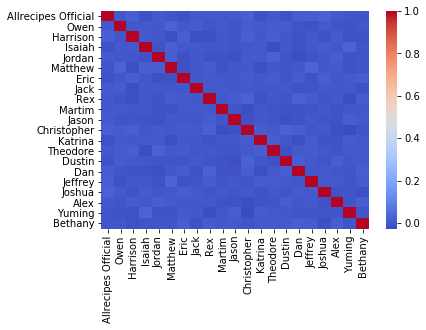

In [786]:
sim_matrix = cosine_similarity(rr_df_mc)
rr_sim = pd.DataFrame(sim_matrix, columns=rr_df_mc.index, index=rr_df_mc.index)
sns.heatmap(rr_sim, annot=False, cmap='coolwarm')

In [787]:
rr_df4.head()

,3.0,6663.0,6664.0,6665.0,6666.0,6667.0,6669.0,6670.0,6671.0,6672.0,...,48077.0,48121.0,48123.0,48125.0,48144.0,48150.0,48156.0,48161.0,48171.0,48187.0
Allrecipes Official,4.65,4.176471,4.327586,3.623116,4.701755,4.339449,4.313044,4.806061,4.594594,3.954545,...,3.714286,4.563107,3.84375,4.637362,NaN,NaN,NaN,NaN,NaN,NaN
Owen,5.00,NaN,3.000000,2.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,...,5.000000,5.000000,4.00000,NaN,4.0,5.0,2.0,4.0,1.0,1.0
Harrison,5.00,3.000000,4.000000,3.000000,2.000000,3.000000,5.000000,2.000000,4.000000,NaN,...,1.000000,2.000000,5.00000,1.000000,3.0,5.0,3.0,4.0,1.0,NaN
Isaiah,4.00,NaN,1.000000,4.000000,2.000000,1.000000,2.000000,4.000000,1.000000,2.000000,...,1.000000,4.000000,3.00000,4.000000,3.0,3.0,5.0,1.0,5.0,3.0
Jordan,4.00,1.000000,4.000000,1.000000,5.000000,NaN,4.000000,1.000000,5.000000,1.000000,...,4.000000,1.000000,3.00000,3.000000,5.0,1.0,4.0,1.0,4.0,3.0


In [788]:
rr_sim.head()

,Allrecipes Official,Owen,Harrison,Isaiah,Jordan,Matthew,Eric,Jack,Rex,Martim,...,Christopher,Katrina,Theodore,Dustin,Dan,Jeffrey,Joshua,Alex,Yuming,Bethany
Allrecipes Official,1.000000,0.002131,0.019635,-0.010880,0.006987,-0.005415,-0.012928,0.008346,0.002031,0.003420,...,0.020414,-0.011844,0.004176,-0.009956,0.010080,0.016324,0.021678,0.003768,-0.003395,-0.005026
Owen,0.002131,1.000000,-0.002258,0.003591,0.003088,0.027205,0.002306,0.011634,-0.003400,0.008693,...,0.011462,0.007901,0.012676,0.012332,-0.003982,-0.011044,0.005658,-0.006735,-0.007951,0.000999
Harrison,0.019635,-0.002258,1.000000,0.008578,-0.000832,-0.016944,0.017394,-0.014982,-0.017763,-0.000388,...,0.018153,0.002141,0.014764,0.003764,-0.009724,0.004508,-0.007068,0.009613,-0.014087,-0.014015
Isaiah,-0.010880,0.003591,0.008578,1.000000,-0.007551,0.018292,0.003714,0.004690,-0.000624,0.003721,...,0.001015,0.007776,-0.019033,-0.002711,-0.011025,0.002446,0.009299,0.001215,0.033059,-0.003580
Jordan,0.006987,0.003088,-0.000832,-0.007551,1.000000,0.013532,-0.013936,0.001400,-0.007246,-0.007157,...,0.006268,0.005578,0.025291,-0.003190,-0.015595,-0.007660,-0.000569,0.015135,-0.009488,-0.003559


In [812]:
# Lets check Isaiah's similarity to other users!
# get Nancy's similarity scores
isaiah_sim = rr_sim['Isaiah']#.drop('Isaiah')
# isaiah_sim_pos = isaiah_sim[isaiah_sim > 0]
isaiah_sim

Allrecipes Official   -0.010880
Owen                   0.003591
Harrison               0.008578
Isaiah                 1.000000
Jordan                -0.007551
Matthew                0.018292
Eric                   0.003714
Jack                   0.004690
Rex                   -0.000624
Martim                 0.003721
Jason                 -0.005331
Christopher            0.001015
Katrina                0.007776
Theodore              -0.019033
Dustin                -0.002711
Dan                   -0.011025
Jeffrey                0.002446
Joshua                 0.009299
Alex                   0.001215
Yuming                 0.033059
Bethany               -0.003580
Name: Isaiah, dtype: float64

In [813]:
isaiah_weights = isaiah_sim.values/np.sum(isaiah_sim.values)

In [797]:
allrecipes_official_sim = rr_sim['Allrecipes Official']
owen_sim = rr_sim['Owen']
harrison_sim = rr_sim['Harrison']
isaiah_sim = rr_sim['Isaiah']
jordan_sim = rr_sim['Jordan']
matthew_sim = rr_sim['Matthew']
eric_sim = rr_sim['Eric']
jack_sim = rr_sim['Jack']
rex_sim = rr_sim['Rex']
martim_sim = rr_sim['Martim']
jason_sim = rr_sim['Jason']
christopher_sim = rr_sim['Christopher']
katrina_sim = rr_sim['Katrina']
theodore_sim = rr_sim['Theodore']
dustin_sim = rr_sim['Dustin']
dan_sim = rr_sim['Dan']
jeffrey_sim = rr_sim['Jeffrey']
joshua_sim = rr_sim['Joshua']
alex_sim = rr_sim['Alex']
yuming_sim = rr_sim['Yuming']
bethany_sim = rr_sim['Bethany']
jordan_sim = rr_sim['Jordan']

In [798]:
allrecipes_official_weights = allrecipes_official_sim.values/np.sum(allrecipes_official_sim.values)
owen_weights = owen_sim.values/np.sum(owen_sim.values)
harrison_weights = harrison_sim.values/np.sum(harrison_sim.values)
isaiah_weights = isaiah_sim.values/np.sum(isaiah_sim.values)
jordan_weights = jordan_sim.values/np.sum(jordan_sim.values)
matthew_weights = matthew_sim.values/np.sum(matthew_sim.values)
eric_weights = eric_sim.values/np.sum(eric_sim.values)
jack_weights = jack_sim.values/np.sum(jack_sim.values)
rex_weights = rex_sim.values/np.sum(rex_sim.values)
martim_weights = martim_sim.values/np.sum(martim_sim.values)
jason_weights = jason_sim.values/np.sum(jason_sim.values)
christopher_weights = christopher_sim.values/np.sum(christopher_sim.values)
katrina_weights = katrina_sim.values/np.sum(katrina_sim.values)
theodore_weights = theodore_sim.values/np.sum(theodore_sim.values)
dustin_weights = dustin_sim.values/np.sum(dustin_sim.values)
dan_weights = dan_sim.values/np.sum(dan_sim.values)
jeffrey_weights = jeffrey_sim.values/np.sum(jeffrey_sim.values)
joshua_weights = joshua_sim.values/np.sum(joshua_sim.values)
alex_weights = alex_sim.values/np.sum(alex_sim.values)
yuming_weights = yuming_sim.values/np.sum(yuming_sim.values)
bethany_weights = bethany_sim.values/np.sum(bethany_sim.values)
jordan_weights = jordan_sim.values/np.sum(jordan_sim.values)

Who likes Mulligatawney soup as much as Isaiah!?

In [818]:
# Get ratings for item 13087
ratings_13087_full = rr_df3[13087].loc[rr_sim.index]
ratings_13087 = ratings_13087_full.drop('Isaiah')

In [819]:
np.dot(ratings_13087.values, isaiah_weights)

ValueError: shapes (20,) and (21,) not aligned: 20 (dim 0) != 21 (dim 0)

In [811]:
ratings = users.T
ratings = ratings[ratings['Nancy'].isnull()]
ratings = ratings.drop('Nancy', axis=1)
ratings = ratings[nancy_sim.index]

nancy_ratings = np.dot(ratings.fillna(0).values, nancy_weights)
nancy_ratings

AttributeError: 'list' object has no attribute 'T'